In [1]:
#import des fichiers et load des ressources
import functions
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
import numpy as np

data = pd.read_csv('cleaned_data.csv')
pd.options.display.max_columns = data.shape[1]

In [2]:
#initialisation des valeurs explicatives et dépendantes
X = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)'] + list(
    data.filter(regex='^(LargestPropertyUseType_|Neighborhood_)').columns)
y = 'TotalGHGEmissions'

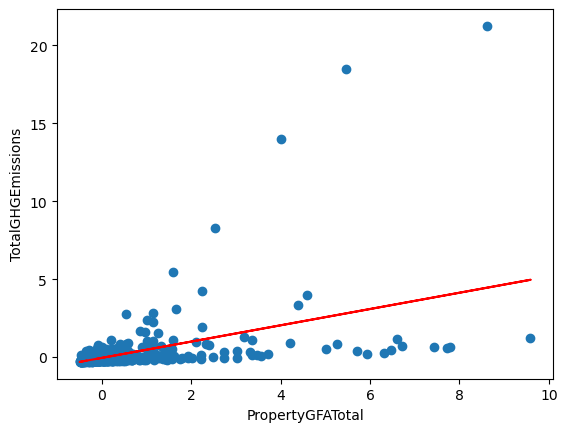

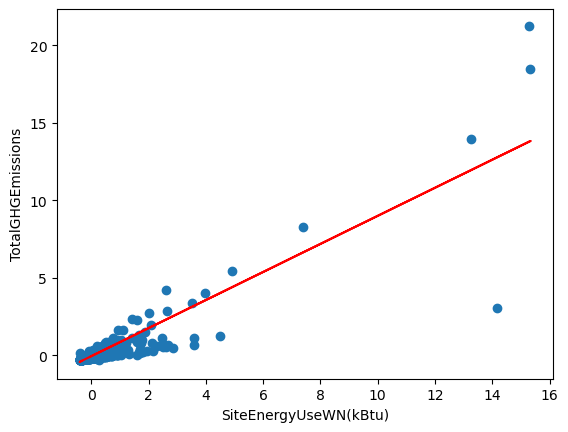

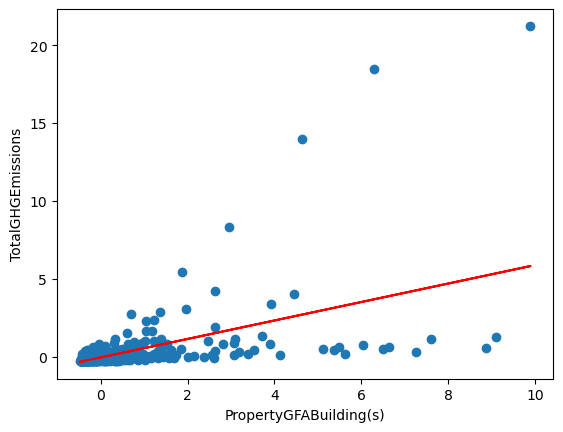

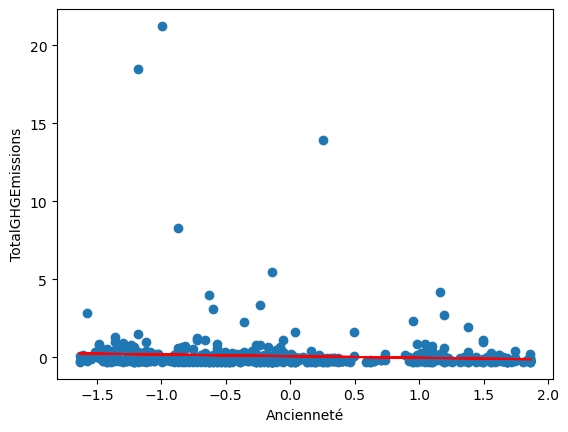

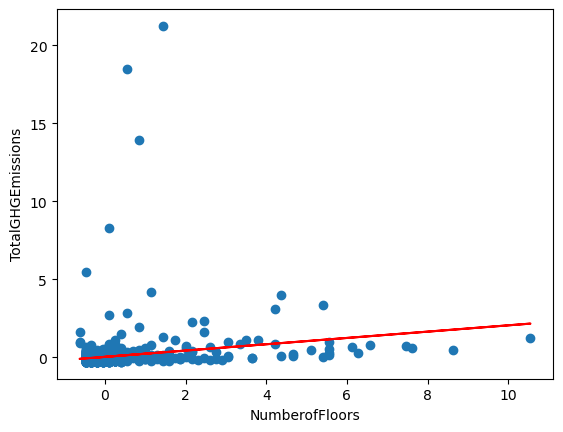

In [3]:
# quelques analyses bivariées
functions.showScatterPlot(data, 'PropertyGFATotal', y)
functions.showScatterPlot(data, 'SiteEnergyUseWN(kBtu)', y)
functions.showScatterPlot(data, 'PropertyGFABuilding(s)', y)
functions.showScatterPlot(data, 'Ancienneté', y)
functions.showScatterPlot(data, 'NumberofFloors', y)

In [4]:
#dummy_regressor
functions.dummy_regressor_model(data, X, y)

Prédiction moyenne :  [0.08716199 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199
 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199
 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199
 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199
 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199
 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199
 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199
 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199
 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199
 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199
 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199
 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199
 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199
 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199 0.08716199
 0.08716199 0.08716199 0.08716199 0.0871

In [5]:
# Données d'entraînement et test

X_train, X_test, y_train, y_test = functions.train_test_split_data(data, X, y)

In [6]:
mse_lin_list = []

for i in range(100):
    mse_lin = functions.linear_regression(X_train, X_test, y_train, y_test)
    mse_lin_list.append(mse_lin)

average_mse_lin = sum(mse_lin_list) / len(mse_lin_list)
print("Average MSE:", average_mse_lin)


Average MSE: 7.349944567411758e+20


In [27]:
mse_tree_list = []
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
model = DecisionTreeRegressor()
param_grid = {'max_depth': max_depth}
for i in range(100):
    grid_search, results_df = functions.get_grid(model, X_train, y_train, param_grid)
    # data = results_df[['params', 'mean_test_score', 'std_test_score']]
    best_depth = grid_search.best_params_['max_depth']
    model_to_evaluate = DecisionTreeRegressor(max_depth=best_depth)
    tree, mse = functions.evaluate_model(model_to_evaluate,X_train, X_test, y_train, y_test)
    mse_tree_list.append(mse)
#
average_mse_tree = sum(mse_tree_list) / len(mse_tree_list)
print("Average MSE tree:", average_mse_tree)

Average MSE: 0.9846372469736207


In [28]:
mse_ridge_list = []
model = Ridge()
param_grid = {'alpha': [0.1, 1, 10]}

grid_search, results_df = functions.get_grid(model, X_train, y_train, param_grid)
best_alpha = grid_search.best_params_['alpha']
model_to_evaluate = Ridge(alpha=best_alpha)
ridge, mse_ridge = functions.evaluate_model(model_to_evaluate,X_train, X_test, y_train, y_test)
print(best_alpha)
print("MSE ridge:", mse_ridge)


10
MSE: 0.8428566709239895
